In [1]:
import pandas as pd
import os

# Define the folder path where your datasets are located
data_folder = r'C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset'

# Define the output path and filename for the merged dataset
output_file_path = os.path.join(data_folder, 'merged_dataset_with_year.csv')

# Define all expected column names, based on your latest list
# Ensure this list covers all columns you wish to retain
expected_columns = [
    'AUTHORISATION ID / PERMIT ID',
    'ACTIVITY DESCRIPTION',
    'OPERATOR NAME',
    'SITE ADDRESS',
    'SITE POSTCODE',
    'EASTING',
    'NORTHING',
    'EA AREA NAME',
    'ROUTE NAME',
    'SUBSTANCE NAME',
    'REPORTING THRESHOLD (kg)',
    'QUANTITY RELEASED (kg)',
    'REGULATED INDUSTRY SECTOR',
    'REGULATED INDUSTRY SUB SECTOR',
    'PNEC (??g/L)', # Note the special characters '??' in this column name
    'Latitude',
    'Longitude',
    'REGION',
    'COUNTY',
    'EA AREA NAME LABEL',
    'ROUTE NAME LABEL'
]

# Create an empty list to store each DataFrame
all_dfs = []

# Loop through years from 2016 to 2023
for year_suffix in range(16, 24):
    year = 2000 + year_suffix
    file_name = f'd{year_suffix}_v4.csv'
    file_path = os.path.join(data_folder, file_name)

    try:
        # Attempt to read the CSV file
        # If special characters in 'PNEC (??g/L)' cause encoding issues, you might need to specify encoding.
        # Example: df = pd.read_csv(file_path, encoding='latin1')
        df = pd.read_csv(file_path)

        # --- Core column name standardization steps ---
        # 1. Strip leading/trailing whitespace from column names
        df.columns = df.columns.str.strip()
        # 2. Convert column names to uppercase to ensure case consistency
        df.columns = df.columns.str.upper()

        # Standardize the expected column names as well for matching
        standardized_expected_columns = [col.strip().upper() for col in expected_columns]

        # Check for and add any missing columns to ensure consistent structure across all DataFrames
        for col in standardized_expected_columns:
            if col not in df.columns:
                df[col] = pd.NA # Or None, depending on your preferred empty value type

        # Reorder and select only the columns we care about, ensuring identical column order and names
        df = df[standardized_expected_columns]

        # Add the 'Year' column
        df['Year'] = year
        all_dfs.append(df)
        print(f"Successfully loaded and processed file: {file_name}")

    except FileNotFoundError:
        print(f"File not found: {file_name}. Please check if the file exists and the path is correct.")
    except Exception as e:
        print(f"An error occurred while loading file {file_name}: {e}")

# Concatenate all DataFrames into a single one
if all_dfs:
    merged_df = pd.concat(all_dfs, ignore_index=True)
    print("\nAll datasets have been successfully merged!")
    print(f"The merged dataset contains {len(merged_df)} rows and {len(merged_df.columns)} columns.")

    # Save the merged dataset to the specified path
    merged_df.to_csv(output_file_path, index=False)
    print(f"The merged dataset has been saved to: {output_file_path}")
else:
    print("\nNo datasets were loaded successfully. Please check your files.")

Successfully loaded and processed file: d16_v4.csv
Successfully loaded and processed file: d17_v4.csv
Successfully loaded and processed file: d18_v4.csv
Successfully loaded and processed file: d19_v4.csv
Successfully loaded and processed file: d20_v4.csv
Successfully loaded and processed file: d21_v4.csv
Successfully loaded and processed file: d22_v4.csv
Successfully loaded and processed file: d23_v4.csv

All datasets have been successfully merged!
The merged dataset contains 9678 rows and 22 columns.
The merged dataset has been saved to: C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the chart style
sns.set(style="whitegrid")

# Path
file_path = r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv"

# Read data
df = pd.read_csv(file_path)

# Standardized pollutant names
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

In [6]:
# Define PNEC value dictionary (unit: µg/L)
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

# Add PNEC column
df['PNEC (µg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)

# Recalculate Toxic Pressure
df['PNEC-normalized Emission Load'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (µg/L)']

# Check if it succeeded
print(df[['SUBSTANCE NAME', 'QUANTITY RELEASED (KG)', 'PNEC (µg/L)', 'PNEC-normalized Emission Load']].head())

  SUBSTANCE NAME  QUANTITY RELEASED (KG)  PNEC (µg/L)  \
0   Fluoranthene                    0.13     0.000762   
1   Fluoranthene                    0.22     0.000762   
2   Fluoranthene                    0.29     0.000762   
3   Fluoranthene                    0.52     0.000762   
4   Fluoranthene                    0.53     0.000762   

   PNEC-normalized Emission Load  
0                     170.603675  
1                     288.713911  
2                     380.577428  
3                     682.414698  
4                     695.538058  


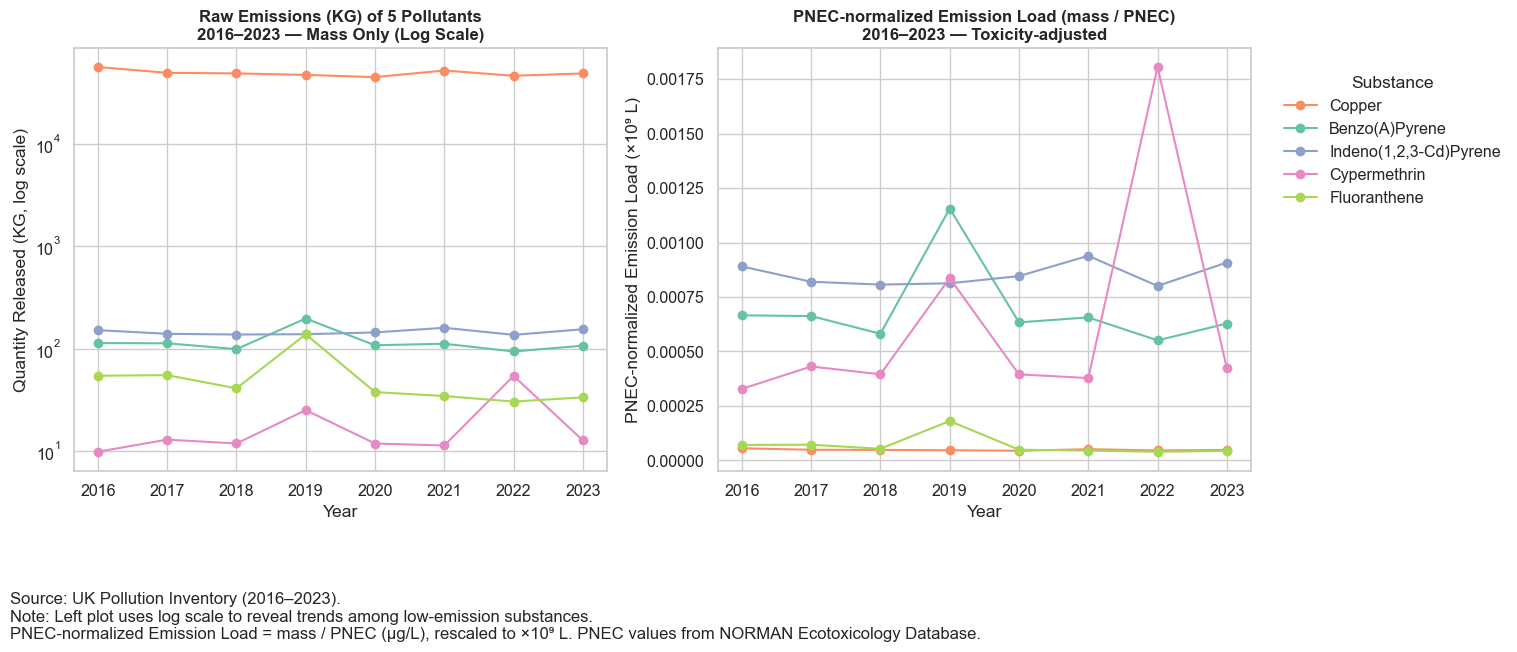

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.05)

# ------------------------
# Load dataset
# ------------------------
df = pd.read_csv(r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv")
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# ------------------------
# Define PNEC values (µg/L)
# These values are from the NORMAN Ecotoxicology Database
# ------------------------
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

# ------------------------
# Calculate PNEC-normalized Emission Load
# kg / (µg/L) = (kg × L) / µg = 1e9 L (billion L)
# Then scale to billion litres for readability
# ------------------------
df['PNEC (µg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['PNEC-normalized Emission Load'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (µg/L)']
df['PNEC-normalized Emission Load'] = df['PNEC-normalized Emission Load'] / 1e9  # => billion L

# ------------------------
# Prepare color palette
# ------------------------
substance_colors = {
    "Copper": "#FC8D62",
    "Benzo(A)Pyrene": "#66C2A5",
    "Indeno(1,2,3-Cd)Pyrene": "#8DA0CB",
    "Cypermethrin": "#E78AC3",
    "Fluoranthene": "#A6D854"
}

# ------------------------
# Aggregate for plots
# ------------------------
df_mass = df.groupby(['Year', 'SUBSTANCE NAME'])['QUANTITY RELEASED (KG)'].sum().reset_index()
df_tp = df.groupby(['Year', 'SUBSTANCE NAME'])['PNEC-normalized Emission Load'].sum().reset_index()

# ------------------------
# Plot: side by side
# ------------------------
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Plot 1: Raw emissions (log scale)
for substance in substance_colors:
    data = df_mass[df_mass['SUBSTANCE NAME'] == substance]
    axes[0].plot(data['Year'], data['QUANTITY RELEASED (KG)'],
                 label=substance, color=substance_colors[substance], marker='o')
axes[0].set_yscale('log')
axes[0].set_title("Raw Emissions (KG) of 5 Pollutants\n2016–2023 — Mass Only (Log Scale)", fontsize=12, weight='bold')
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Quantity Released (KG, log scale)")

# Plot 2: Toxic risk load (PNEC-normalized)
for substance in substance_colors:
    data = df_tp[df_tp['SUBSTANCE NAME'] == substance]
    axes[1].plot(data['Year'], data['PNEC-normalized Emission Load'],
                 label=substance, color=substance_colors[substance], marker='o')
axes[1].set_title("PNEC-normalized Emission Load (mass / PNEC)\n2016–2023 — Toxicity-adjusted", fontsize=12, weight='bold')
axes[1].set_xlabel("Year")
axes[1].set_ylabel("PNEC-normalized Emission Load (×10⁹ L)")

# ------------------------
# Extract combined legend and place outside right
# ------------------------
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Substance",
           loc='center left', bbox_to_anchor=(0.85, 0.75), frameon=False)

# ------------------------
# Comments & source
# ------------------------
fig.text(0.01, -0.08,
         "Source: UK Pollution Inventory (2016–2023).\n"
         "Note: Left plot uses log scale to reveal trends among low-emission substances.\n"
         "PNEC-normalized Emission Load = mass / PNEC (µg/L), rescaled to ×10⁹ L. PNEC values from NORMAN Ecotoxicology Database.",
         fontsize=12, ha='left')

# ------------------------
# Save and show
# ------------------------
plt.tight_layout(rect=[0, 0.1, 0.85, 1])  # leave space on right for legend
plt.subplots_adjust(bottom=0.2) 
plt.savefig(r"C:\Users\qp24297\Downloads\Slide4_5_Comparison_LegendFixed_UPDATED.png", dpi=300)
plt.show()

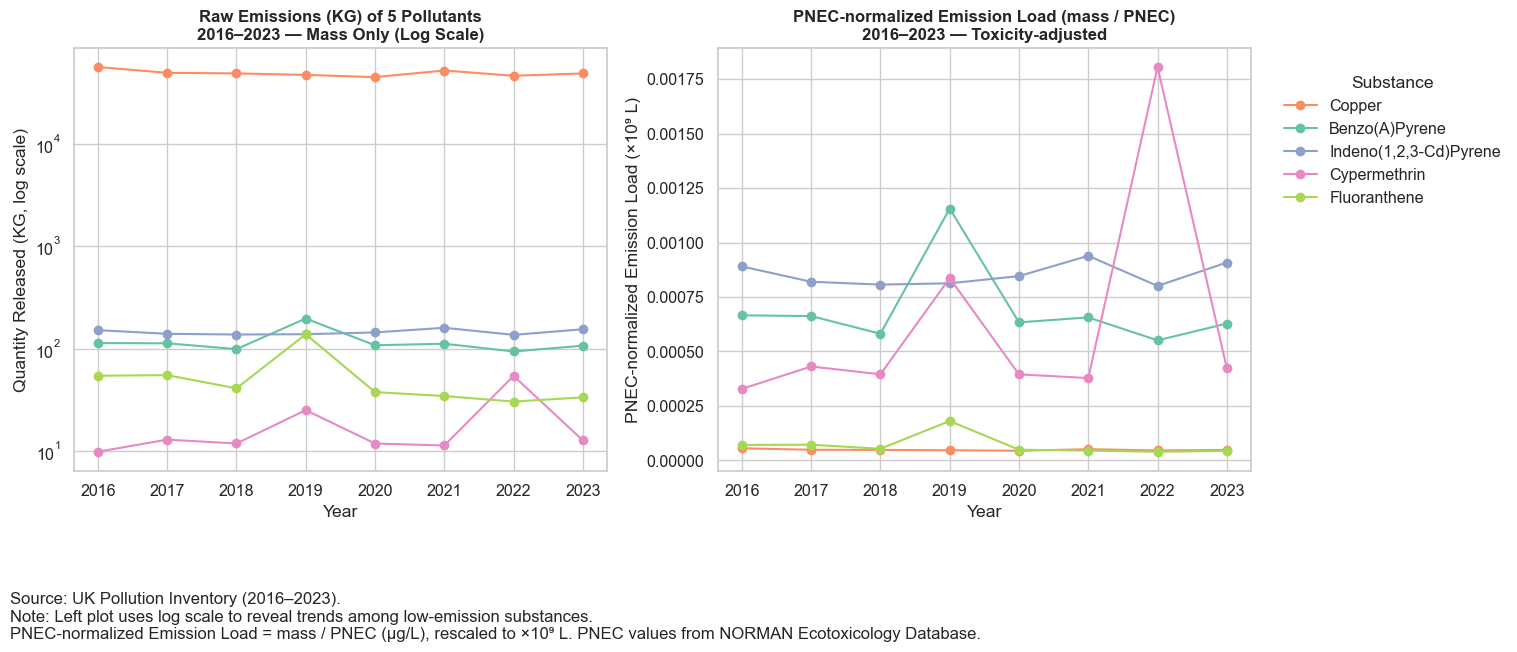

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.05)

# ------------------------
# Load dataset
# ------------------------
df = pd.read_csv(r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv")
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# ------------------------
# Define PNEC values (µg/L)
# These values are from the NORMAN Ecotoxicology Database
# ------------------------
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}

# ------------------------
# Calculate PNEC-normalized Emission Load
# kg / (µg/L) = (kg × L) / µg = 1e9 L (billion L)
# Then scale to billion litres for readability
# ------------------------
df['PNEC (µg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['PNEC-normalized Emission Load'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (µg/L)']
df['PNEC-normalized Emission Load'] = df['PNEC-normalized Emission Load'] / 1e9  # => billion L

# ------------------------
# Prepare color palette
# ------------------------
substance_colors = {
    "Copper": "#FC8D62",
    "Benzo(A)Pyrene": "#66C2A5",
    "Indeno(1,2,3-Cd)Pyrene": "#8DA0CB",
    "Cypermethrin": "#E78AC3",
    "Fluoranthene": "#A6D854"
}

# ------------------------
# Aggregate for plots
# ------------------------
df_mass = df.groupby(['Year', 'SUBSTANCE NAME'])['QUANTITY RELEASED (KG)'].sum().reset_index()
df_tp = df.groupby(['Year', 'SUBSTANCE NAME'])['PNEC-normalized Emission Load'].sum().reset_index()

# ------------------------
# Plot: side by side
# ------------------------
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Plot 1: Raw emissions (log scale)
for substance in substance_colors:
    data = df_mass[df_mass['SUBSTANCE NAME'] == substance]
    axes[0].plot(data['Year'], data['QUANTITY RELEASED (KG)'],
                 label=substance, color=substance_colors[substance], marker='o')
axes[0].set_yscale('log')
axes[0].set_title("Raw Emissions (KG) of 5 Pollutants\n2016–2023 — Mass Only (Log Scale)", fontsize=12, weight='bold')
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Quantity Released (KG, log scale)")

# Plot 2: Toxic risk load (PNEC-normalized)
for substance in substance_colors:
    data = df_tp[df_tp['SUBSTANCE NAME'] == substance]
    axes[1].plot(data['Year'], data['PNEC-normalized Emission Load'],
                 label=substance, color=substance_colors[substance], marker='o')
axes[1].set_title("PNEC-normalized Emission Load (mass / PNEC)\n2016–2023 — Toxicity-adjusted", fontsize=12, weight='bold')
axes[1].set_xlabel("Year")
axes[1].set_ylabel("PNEC-normalized Emission Load (×10⁹ L)")

# ------------------------
# Extract combined legend and place outside right
# ------------------------
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Substance",
           loc='center left', bbox_to_anchor=(0.85, 0.75), frameon=False)

# ------------------------
# Comments & source
# ------------------------
fig.text(0.01, -0.08,
         "Source: UK Pollution Inventory (2016–2023).\n"
         "Note: Left plot uses log scale to reveal trends among low-emission substances.\n"
         "PNEC-normalized Emission Load = mass / PNEC (µg/L), rescaled to ×10⁹ L. PNEC values from NORMAN Ecotoxicology Database.",
         fontsize=12, ha='left')

# ------------------------
# Save and show
# ------------------------
plt.tight_layout(rect=[0, 0.1, 0.85, 1])  # leave space on right for legend
plt.subplots_adjust(bottom=0.2) 
plt.savefig(r"C:\Users\qp24297\Downloads\Slide4_5_Comparison_LegendFixed_UPDATED.png", dpi=300, bbox_inches='tight')
plt.show()

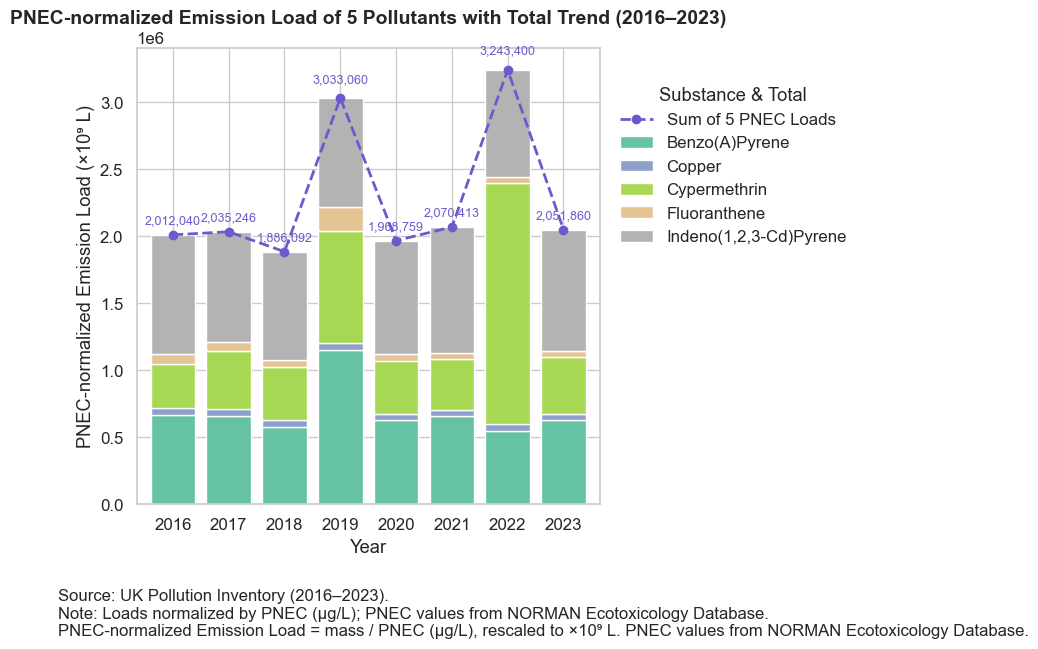

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set(style="whitegrid", font_scale=1.1)

# Read data
df = pd.read_csv(r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv")
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# Define PNEC (µg/L) and calculate Toxic Pressure (KG / µg/L)
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}
df['PNEC (µg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['Toxic Pressure'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (µg/L)']

# Pivot + total
df_tp = df.groupby(['Year', 'SUBSTANCE NAME'])['Toxic Pressure'].sum().reset_index()
df_tp_pivot = df_tp.pivot(index='Year', columns='SUBSTANCE NAME', values='Toxic Pressure').fillna(0)
df_total = df_tp_pivot.sum(axis=1).reset_index(name='Total TP')

# ✅ Start drawing
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar
df_tp_pivot.plot(kind='bar', stacked=True, ax=ax, colormap='Set2', width=0.8)

# Total line (using ×10⁹ L)
df_total['Total TP (x10⁹ L)'] = df_total['Total TP'] * 1e-9
ax.plot(df_total['Year'] - df_total['Year'].min(), df_total['Total TP'],
        color='slateblue', linestyle='--', marker='o', linewidth=2, label='Sum of 5 PNEC Loads')

# Annotations with ×10⁹
# Add numerical annotation (scientific format, keeps same scale)
for i, row in df_total.iterrows():
    ax.text(i, row['Total TP'] * 1.03, f"{int(row['Total TP']):,}",
            color='slateblue', ha='center', va='bottom', fontsize=9)

# Axes & titles
ax.set_title("PNEC-normalized Emission Load of 5 Pollutants with Total Trend (2016–2023)",
             fontsize=14, weight='bold')
ax.set_ylabel("PNEC-normalized Emission Load (×10⁹ L)")
ax.set_xlabel("Year")
ax.set_xticks(range(len(df_tp_pivot.index)))
ax.set_xticklabels(df_tp_pivot.index, rotation=0)

# Legend adjusted closer
ax.legend(title="Substance & Total", bbox_to_anchor=(1.01, 0.95), loc='upper left', frameon=False)

# Footer
fig.text(0.001, -0.05,
         "Source: UK Pollution Inventory (2016–2023).\n"
         "Note: Loads normalized by PNEC (µg/L); PNEC values from NORMAN Ecotoxicology Database.\n"
         "PNEC-normalized Emission Load = mass / PNEC (µg/L), rescaled to ×10⁹ L. PNEC values from NORMAN Ecotoxicology Database.",
         fontsize=12, ha='left')

# Save & show
plt.tight_layout(rect=[0, 0.05, 0.82, 1])
plt.savefig(r"C:\Users\qp24297\Downloads\Slide5_ToxicPressure_Final_UPDATED.png", dpi=300, bbox_inches='tight')
plt.show()


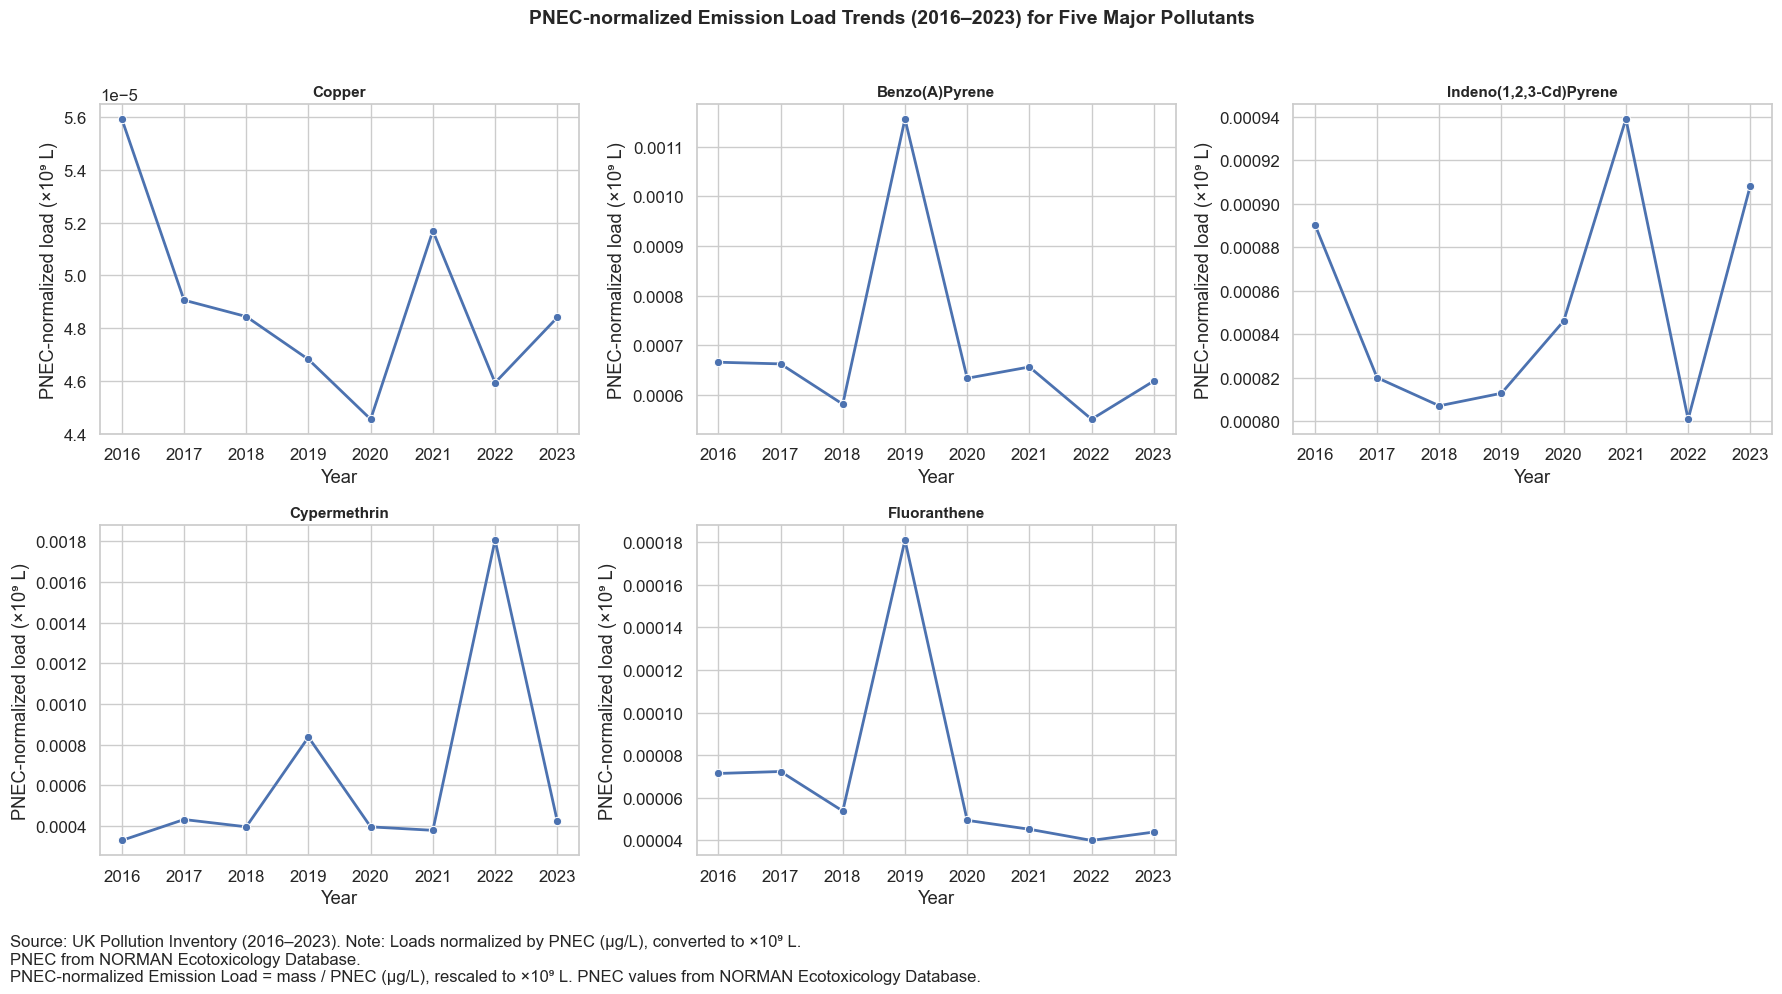

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

# Read dataset
df = pd.read_csv(r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv")
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# Define PNEC and calculate normalized load
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}
df['PNEC (µg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['PNEC-normalized Load'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (µg/L)']

# Convert to ×10⁹ L scale for clarity
df['PNEC-normalized Load'] /= 1e9

# Substances to plot
substances = ["Copper", "Benzo(A)Pyrene", "Indeno(1,2,3-Cd)Pyrene", "Cypermethrin", "Fluoranthene"]

# Prepare subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
axes = axes.flatten()

for i, substance in enumerate(substances):
    df_single = df[df['SUBSTANCE NAME'] == substance]
    df_single_yearly = df_single.groupby("Year")["PNEC-normalized Load"].sum().reset_index()
    
    ax = axes[i]
    sns.lineplot(x="Year", y="PNEC-normalized Load", data=df_single_yearly,
                 marker="o", linewidth=2.0, ax=ax)
    ax.set_title(f"{substance}", fontsize=11, weight='bold')
    ax.set_xlabel("Year")
    ax.set_ylabel("PNEC-normalized load (×10⁹ L)")
    ax.grid(True, axis='y')

# Remove last empty subplot (axes[5])
fig.delaxes(axes[5])

# Title and single concise footer note
fig.suptitle("PNEC-normalized Emission Load Trends (2016–2023) for Five Major Pollutants",
             fontsize=14, weight='bold', y=1.02)
fig.text(0.01, -0.06,
    "Source: UK Pollution Inventory (2016–2023). Note: Loads normalized by PNEC (µg/L), converted to ×10⁹ L.\n"
    "PNEC from NORMAN Ecotoxicology Database.\n"
    "PNEC-normalized Emission Load = mass / PNEC (µg/L), rescaled to ×10⁹ L. PNEC values from NORMAN Ecotoxicology Database.",
    fontsize=12, ha='left')

plt.tight_layout()
plt.savefig(r"C:\Users\qp24297\Downloads\PNEC_Normalized_Load_Grid.png", dpi=300, bbox_inches='tight')
plt.show()


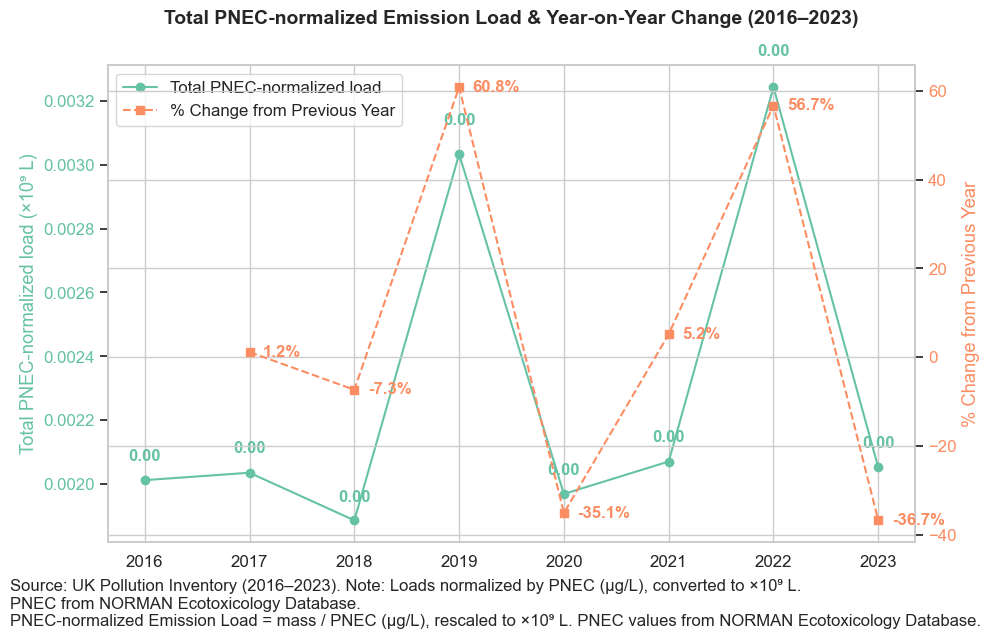

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv(r"C:\Users\qp24297\OneDrive - University of Bristol\Final_dataset\merged_dataset_with_year.csv")
df['SUBSTANCE NAME'] = df['SUBSTANCE NAME'].str.title()

# Define PNEC and calculate normalized load
pnec_values = {
    "Indeno(1,2,3-Cd)Pyrene": 0.00017,
    "Benzo(A)Pyrene": 0.00017,
    "Cypermethrin": 0.00003,
    "Fluoranthene": 0.000762,
    "Copper": 1.0
}
df['PNEC (µg/L)'] = df['SUBSTANCE NAME'].map(pnec_values)
df['PNEC-normalized Load'] = df['QUANTITY RELEASED (KG)'] / df['PNEC (µg/L)']

# Rescale to ×10^9 L
df['PNEC-normalized Load'] /= 1e9

# Compute total by year
df_total_tp = df.groupby("Year")["PNEC-normalized Load"].sum().reset_index()
df_total_tp["% Change"] = df_total_tp["PNEC-normalized Load"].pct_change() * 100

# Plot double y-axis chart
fig, ax1 = plt.subplots(figsize=(10,6))

# Left Y axis: total normalized load
color1 = "#66C2A5"
ax1.plot(df_total_tp["Year"], df_total_tp["PNEC-normalized Load"], 
         marker='o', color=color1, label="Total PNEC-normalized load")
ax1.set_ylabel("Total PNEC-normalized load (×10⁹ L)", color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(axis='y')

# Annotate values on the first line (slightly above)
for x, y in zip(df_total_tp["Year"], df_total_tp["PNEC-normalized Load"]):
    ax1.text(x, y * 1.03, f"{y:.2f}", color=color1, fontsize=12, weight='bold', ha='center')

# Right Y axis: year-on-year % change
ax2 = ax1.twinx()
color2 = "#FC8D62"
ax2.plot(df_total_tp["Year"], df_total_tp["% Change"], 
         marker='s', linestyle='--', color=color2, label="% Change from Previous Year")
ax2.set_ylabel("% Change from Previous Year", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Annotate values on the second line (slightly to the right)
for x, y in zip(df_total_tp["Year"], df_total_tp["% Change"]):
    ax2.text(x + 0.13, y, f"{y:.1f}%", color=color2, fontsize=12, weight='bold', ha='left', va='center')

# Title & combined legend
plt.title("Total PNEC-normalized Emission Load & Year-on-Year Change (2016–2023)", 
          fontsize=14, weight='bold', pad=30)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Source and Note in one line, tighter
fig.text(0.01, -0.06,
    "Source: UK Pollution Inventory (2016–2023). Note: Loads normalized by PNEC (µg/L), converted to ×10⁹ L.\n"
    "PNEC from NORMAN Ecotoxicology Database.\n"
    "PNEC-normalized Emission Load = mass / PNEC (µg/L), rescaled to ×10⁹ L. PNEC values from NORMAN Ecotoxicology Database.",
    fontsize=12, ha='left')

plt.tight_layout()
plt.savefig(r"C:\Users\qp24297\Downloads\Total_PNEC_Normalized_Load_with_Bold_Labels.png", dpi=300, bbox_inches='tight')
plt.show()
